In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data =pd.read_csv("/content/gdrive/MyDrive/Google colab/yelp_dataset_100K.csv", on_bad_lines='skip')

NameError: ignored

In [ ]:
data.shape

(99999, 134)

In [ ]:
new_data = data.drop(data.columns[9:134], axis =1)
new_data.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text             date  
0  If you decide to eat here, just be aware it is...   7/7/2018 22:09  
1  I've taken a lot of spin classes over the year...   1/3/2012 15:28  
2  Family diner. Had the buffet. Eclectic assortm...   2/5/2014 20:30  
3  Wow!  Yummy, different,  delicious.   Our favo...    1/4/2015 0:01  
4  Cute interior and owner (?) gave us tour of up...  1/14/2017 20:54

In [ ]:
new_data.shape

(99999, 9)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # attractive and informative statistical graphs
import matplotlib.pyplot as plt # for interactive 2D graphics
%pylab inline

import nltk # natural language processing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [ ]:
new_data.isnull().any()

review_id      False
user_id        False
business_id    False
stars          False
useful         False
funny          False
cool           False
text           False
date            True
dtype: bool

In [ ]:
new_data.describe()

stars        useful         funny          cool
count  99999.000000  99999.000000  99999.000000  99999.000000
mean       3.842898      0.898989      0.257183      0.347033
std        1.354731      2.205195      1.010217      1.066387
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      0.000000      0.000000
75%        5.000000      1.000000      0.000000      0.000000
max        5.000000    320.000000     98.000000     49.000000

Text(0.5, 1.0, 'Count of each star rating')

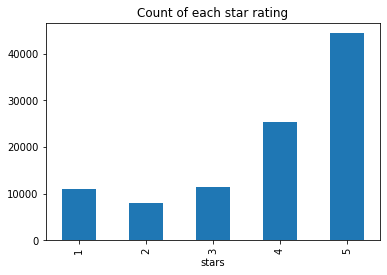

In [ ]:
new_data['stars'].groupby(new_data['stars']).count().plot(kind="bar", sort_columns=True)
plt.title('Count of each star rating')

In [ ]:
new_data['data len']= new_data['text'].apply(len)
Analysis11= new_data.groupby('stars').mean()
Analysis11.corr()

useful     funny      cool  data len
useful    1.000000  0.939518 -0.882676  0.563478
funny     0.939518  1.000000 -0.882302  0.811911
cool     -0.882676 -0.882302  1.000000 -0.606532
data len  0.563478  0.811911 -0.606532  1.000000

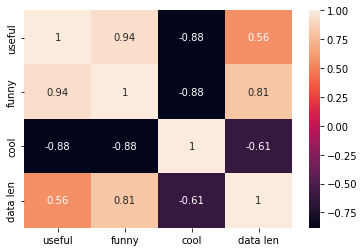

In [ ]:
sns.heatmap(data=Analysis11.corr(), annot=True) #finding correlation

In [ ]:
import os
import nltk
import nltk.corpus

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


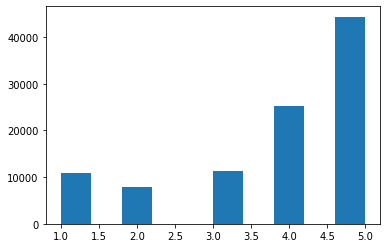

In [ ]:
# Make a column and take the values, save to a variable named "target"
new_data.target = new_data.stars

plt.hist(new_data.target)
plt.show()

In [ ]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = [t for i,t in enumerate(new_data.text)]

In [ ]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
len(documents)

99999

In [ ]:
clean_text1 =[]

def to_lower_case(new_data):
  for words in documents:
    clean_text1.append(str.lower(words))


In [ ]:
to_lower_case(documents)

In [ ]:
clean_text1

["if you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. we have tried it multiple times, because i want to like it! i have been to it's other locations in nj and never had a bad experience. \\n\\nthe food is good, but it takes a very long time to come out. the waitstaff is very young, but usually pleasant. we have just had too many experiences where we spent way too long waiting. we usually opt for another diner or restaurant on the weekends, in order to be done quicker.",
 "i've taken a lot of spin classes over the years, and nothing compares to the classes at body cycle. from the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\\n\\nfor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\\n\\nthere is no way i can write this review without giving russ

In [ ]:
clean_text2 =[]

from nltk.tokenize import word_tokenize , sent_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sent_tok =[]
for sent in clean_text1:
  sent = sent_tokenize(sent)
  sent_tok.append(sent)

In [ ]:
clean_text2 = [word_tokenize(i) for i in clean_text1]

In [ ]:
sent_tok

[['if you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.',
  'we have tried it multiple times, because i want to like it!',
  "i have been to it's other locations in nj and never had a bad experience.",
  '\\n\\nthe food is good, but it takes a very long time to come out.',
  'the waitstaff is very young, but usually pleasant.',
  'we have just had too many experiences where we spent way too long waiting.',
  'we usually opt for another diner or restaurant on the weekends, in order to be done quicker.'],
 ["i've taken a lot of spin classes over the years, and nothing compares to the classes at body cycle.",
  "from the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\\n\\nfor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\\n\\nthere is no way i can

Word Tokenization


In [ ]:
clean_text2

[['if',
  'you',
  'decide',
  'to',
  'eat',
  'here',
  ',',
  'just',
  'be',
  'aware',
  'it',
  'is',
  'going',
  'to',
  'take',
  'about',
  '2',
  'hours',
  'from',
  'beginning',
  'to',
  'end',
  '.',
  'we',
  'have',
  'tried',
  'it',
  'multiple',
  'times',
  ',',
  'because',
  'i',
  'want',
  'to',
  'like',
  'it',
  '!',
  'i',
  'have',
  'been',
  'to',
  'it',
  "'s",
  'other',
  'locations',
  'in',
  'nj',
  'and',
  'never',
  'had',
  'a',
  'bad',
  'experience',
  '.',
  '\\n\\nthe',
  'food',
  'is',
  'good',
  ',',
  'but',
  'it',
  'takes',
  'a',
  'very',
  'long',
  'time',
  'to',
  'come',
  'out',
  '.',
  'the',
  'waitstaff',
  'is',
  'very',
  'young',
  ',',
  'but',
  'usually',
  'pleasant',
  '.',
  'we',
  'have',
  'just',
  'had',
  'too',
  'many',
  'experiences',
  'where',
  'we',
  'spent',
  'way',
  'too',
  'long',
  'waiting',
  '.',
  'we',
  'usually',
  'opt',
  'for',
  'another',
  'diner',
  'or',
  'restaurant',
  

In [ ]:
import re

clean_text3 =[]

for words in clean_text2:
  clean =[]
  for w in words:
    res = re.sub(r'[^\w\s]' , "", w)
    if res != "":
      clean.append(res)
    clean_text3.append(clean)

In [ ]:
clean_text3

[['if',
  'you',
  'decide',
  'to',
  'eat',
  'here',
  'just',
  'be',
  'aware',
  'it',
  'is',
  'going',
  'to',
  'take',
  'about',
  '2',
  'hours',
  'from',
  'beginning',
  'to',
  'end',
  'we',
  'have',
  'tried',
  'it',
  'multiple',
  'times',
  'because',
  'i',
  'want',
  'to',
  'like',
  'it',
  'i',
  'have',
  'been',
  'to',
  'it',
  's',
  'other',
  'locations',
  'in',
  'nj',
  'and',
  'never',
  'had',
  'a',
  'bad',
  'experience',
  'nnthe',
  'food',
  'is',
  'good',
  'but',
  'it',
  'takes',
  'a',
  'very',
  'long',
  'time',
  'to',
  'come',
  'out',
  'the',
  'waitstaff',
  'is',
  'very',
  'young',
  'but',
  'usually',
  'pleasant',
  'we',
  'have',
  'just',
  'had',
  'too',
  'many',
  'experiences',
  'where',
  'we',
  'spent',
  'way',
  'too',
  'long',
  'waiting',
  'we',
  'usually',
  'opt',
  'for',
  'another',
  'diner',
  'or',
  'restaurant',
  'on',
  'the',
  'weekends',
  'in',
  'order',
  'to',
  'be',
  'done',
 


 Stop Word Removal


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
clean_text4 =[]

for words in clean_text3:
  w =[]

  for word in words:
    if not word in stopwords.words('english'):
      w.append(word)
    clean_text4.append(w)